In [5]:
import scanpy as sc
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import numpy as np
from matplotlib.colors import rgb2hex
from matplotlib.lines import Line2D

In [6]:
def create_handles_and_labels(df, column, cm='jet'):
    handles = []
    cm = cmap.get_cmap(cm, len(set(df[column])))
    colors = [rgb2hex(cm(i)) for i in range(cm.N)]
    
    for idx, c in enumerate(colors):
         handles.append(Line2D([], [], color='white', marker='o', markerfacecolor=c, markersize=10))
    
    labels = sorted(set(df[column]))
    return handles, labels 

In [14]:
folder = '../../results/Batch_corrections/seurat/TX/'
output = f'{folder}/dimred_plt/'
os.makedirs(output, exist_ok=True)
file = [folder + x for x in os.listdir(folder) if '_clusters_combined.tsv' in x]
assert len(file) == 1
file = file[0]

In [15]:
umap_df = pd.read_csv(file, header=0, index_col=0, sep='\t')
if 'slide' not in umap_df.columns:
    umap_df['slide'] = [x.split('_')[0] for x in umap_df['sample']]
umap_df = umap_df.sort_values(by='cluster', ascending=True)


In [16]:
umap_df.columns

Index(['sample', 'cluster', 'umap1', 'umap2', 'slide'], dtype='object')

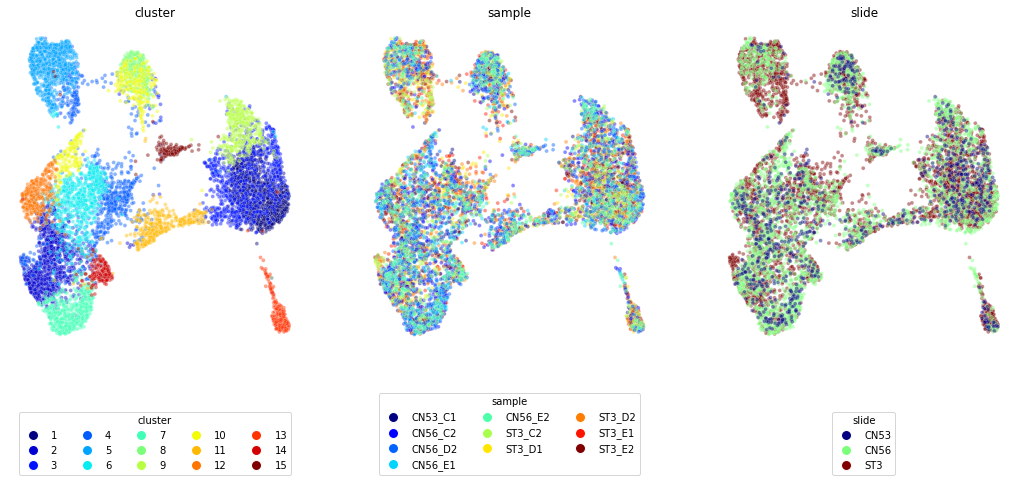

In [17]:
umap_df['cluster'] = umap_df['cluster'].astype('int')
umap_df['sample_cat'] = umap_df['sample'].astype('category').cat.codes
umap_df['slide_cat'] = umap_df['slide'].astype('category').cat.codes

# sns.set_palette('jet')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                   figsize=(18, 6))
cols = ['cluster', 'sample', 'slide']
for ax, col in zip((ax0, ax1, ax2), cols):
    ax.set_title(col)
    umap_df_plt = umap_df.copy()
    value_dict = umap_df_plt[col].value_counts().to_dict()
    umap_df_plt['col_counts'] = umap_df_plt[col].map(value_dict)
    umap_df_plt = umap_df_plt.sort_values(by='col_counts', ascending=False)
    handles, labels = create_handles_and_labels(umap_df_plt, col)
    
    umap_df_plt[col] = umap_df_plt[col].astype('category').cat.codes
        
    sns.scatterplot(data=umap_df_plt, x='umap1', y='umap2', hue=col, 
                        palette=cmap.jet, alpha=0.45, s=15, ax=ax)
         
    lgnd = ax.legend(title=col,
                      handles = handles, labels=labels,
                      loc='lower center', 
                      bbox_to_anchor=(0.5, -0.4),
                    ncol=int(len(handles)/3))
    ax.axis('off')
plt.savefig(f'{output}umap_{"-".join(cols)}.pdf', bbox_inches='tight')
plt.savefig(f'{output}umap_{"-".join(cols)}.png', bbox_inches='tight', dpi=500)
plt.show()